# 🎈 Telco Customer Churn Analysis
Understanding the key factors that influence customers to churn in telecom 

## Bussiness Objective
The goal of this analysis is to find the customers segment who are more likely to churn.<br>
So the company can take preventive actions and reduce customers retention


## ⚒️ KeyFindings & Insights

In [1]:
# Imports & Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('data/Telco-Customer-Churn.csv')

### 🎯Insights 1: Monthly Charges Influence Churns
**Explanation:** The people who churn mostly pay higher than average monthly charges. 

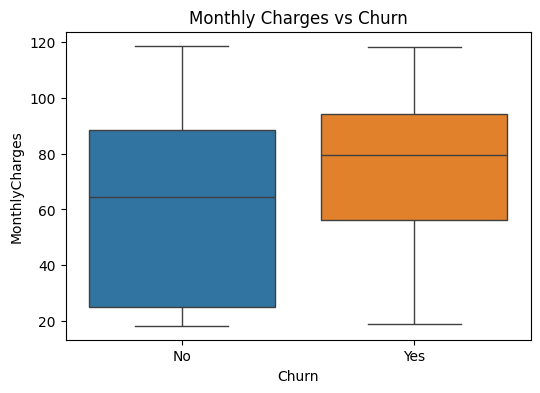

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges vs Churn")
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------**

### 🎯Insights 2: OnlineBackup & Online Security impact on churn 
**Explanation:** The people who have online backup and online security available are less likely to churn.

In [90]:
def plot_churn_rate(service_column):
    pivot = df.pivot_table(index=service_column, columns='Churn', values='customerID', aggfunc='count')
    pivot['ChurnRate'] = pivot['Yes'] / (pivot['Yes'] + pivot['No']) * 100

    ax = pivot['ChurnRate'].plot(kind='barh', color='purple', edgecolor='blue', figsize=(8,4))

    for i, value in enumerate(pivot['ChurnRate']):
        ax.text(value + 0.5, i, f"{value:.1f}%", va='center', fontsize=10)

    plt.title(f"Churn Rate by {service_column}", fontsize=14)
    plt.xlabel("Churn Rate (%)")
    plt.ylabel(service_column)
    plt.xlim(0, 100)
    plt.yticks(rotation=45)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

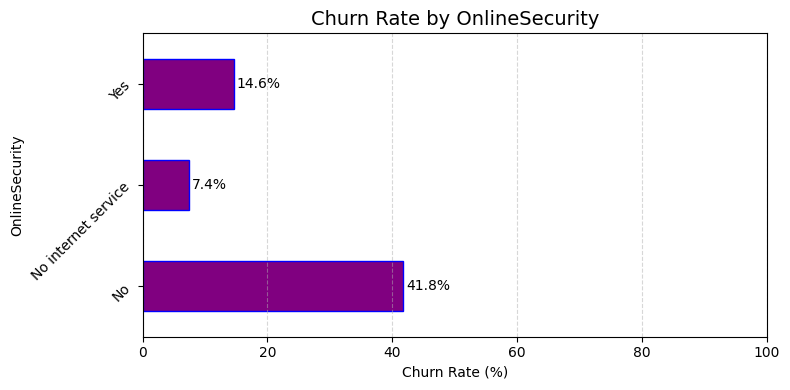

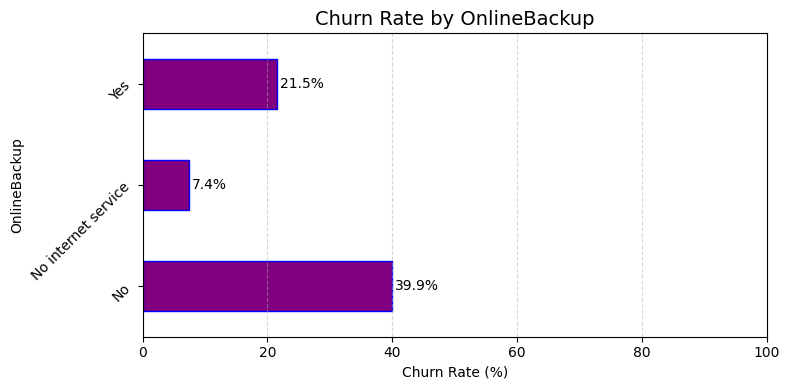

In [91]:
plot_churn_rate('OnlineSecurity')
plot_churn_rate('OnlineBackup')

**Relationship of Techsupport StreamingTv, StreamMovies with Churn**

TechSupport Impact on Churn


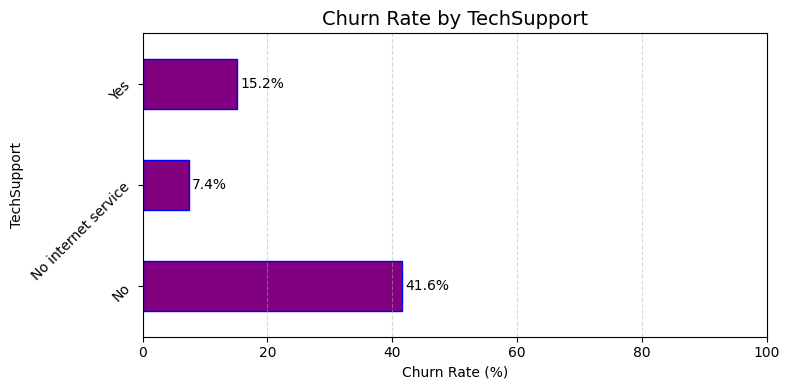

In [92]:
print("TechSupport Impact on Churn")
plot_churn_rate("TechSupport")

ChurnRate With StreamMovies


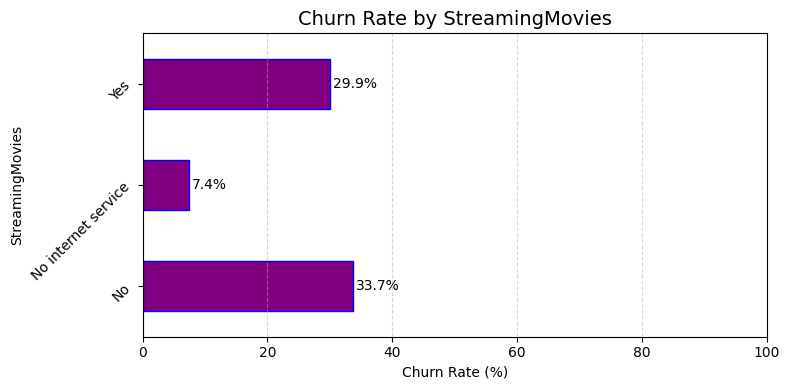

In [93]:
print("ChurnRate With StreamMovies")
plot_churn_rate("StreamingMovies")

ChurnRate With StreamingTV


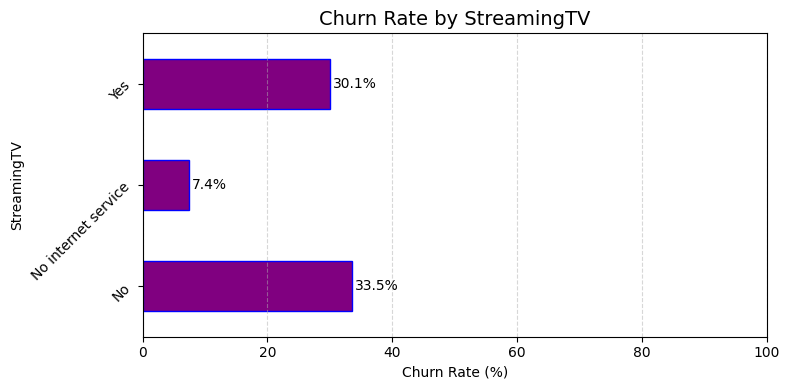

In [94]:
print("ChurnRate With StreamingTV")
plot_churn_rate("StreamingTV")

**📝Conclusion:**
- Support-based services like Online Security, Tech Support, and Backup are negatively correlated with churn.
- Customers with these services tend to stay longer

**------------------------------------------------------------------------------------------------------------------------------------------**

### **🎯Insight 2: Contract Type Impact on Churn**
**Explanation:** This will conclude that customer with longer contract are less likely to churn

In [ ]:
contract_churn = df.pivot_table(index='Contract', columns='Churn', values='customerID', aggfunc='count')
contract_churn['ChurnRate'] = contract_churn['Yes'] / (contract_churn['Yes'] + contract_churn['No'] ) * 100
contract_churn = contract_churn.sort_values(by='ChurnRate', ascending=False)
contract_churn

Churn,No,Yes,ChurnRate
Contract,,,
Month-to-month,2220,1655,42.709677
One year,1307,166,11.269518
Two year,1647,48,2.831858


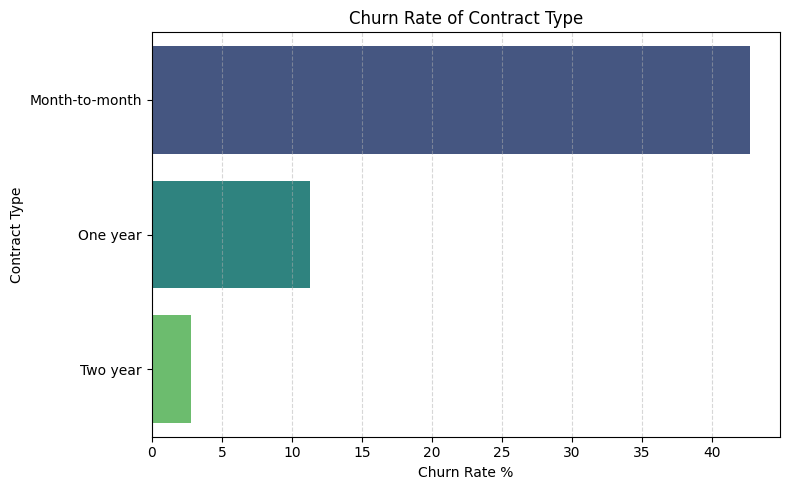

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=contract_churn['ChurnRate'], y=contract_churn.index, hue=contract_churn.index ,palette ='viridis')
plt.title("Churn Rate of Contract Type")
plt.ylabel("Contract Type")
plt.xlabel("Churn Rate %")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**📝Conclusion:**<br>
- People with long Contract Type are less likely to churn than people with short Contract Type

**------------------------------------------------------------------------------------------------------------------------------------------**

### 🎯**Insight 3: Tenure & Contract Type** 
**Explanation:**<br>
Tenure and Contract Type are highly correlated because people with month-to-month contract type have lower tenure.

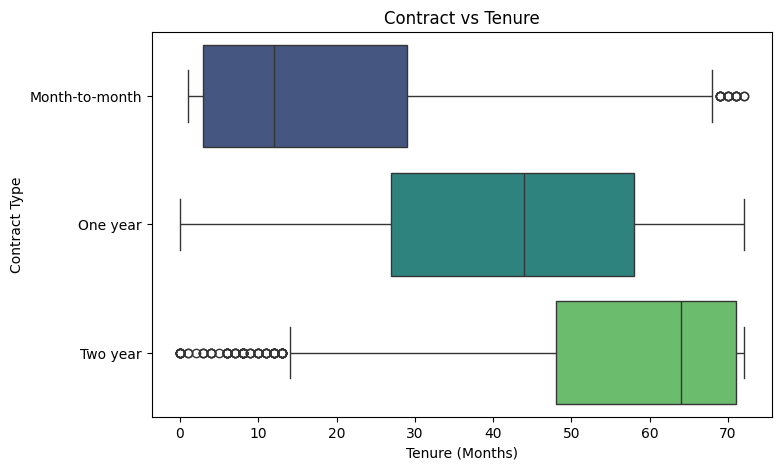

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='tenure', y='Contract',hue='Contract', data=df, palette='viridis')
plt.title("Contract vs Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Contract Type")
plt.show()

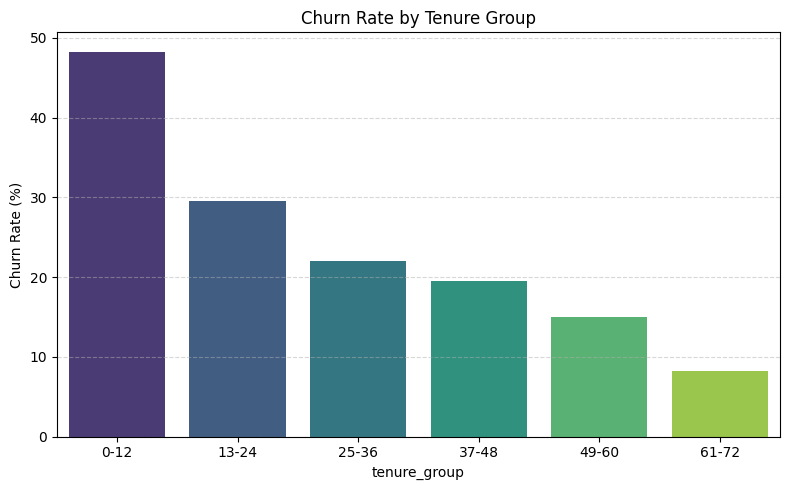

In [80]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12','13-24','25-36','37-48','49-60','61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Churn rate by tenure group
tenure_churn = df.groupby('tenure_group',observed=True)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=tenure_churn.index, y=tenure_churn.values,hue=tenure_churn.index, palette='viridis')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**📝Conclusions:**<br>
- Customers with shorter tenure churn more frequently.
- Longer-tenure customers are more stable and less likely to churn.
- This also connects well with contract length — those who stay longer tend to have longer-term contracts.

**------------------------------------------------------------------------------------------------------------------------------------------**

### 🎯**Insight 4: Payment Methods impact on Churn**
**Explanation:**<br>
We will see here that different payment methods have different effect on Churn

In [67]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()['Yes'] *100

PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Yes, dtype: float64

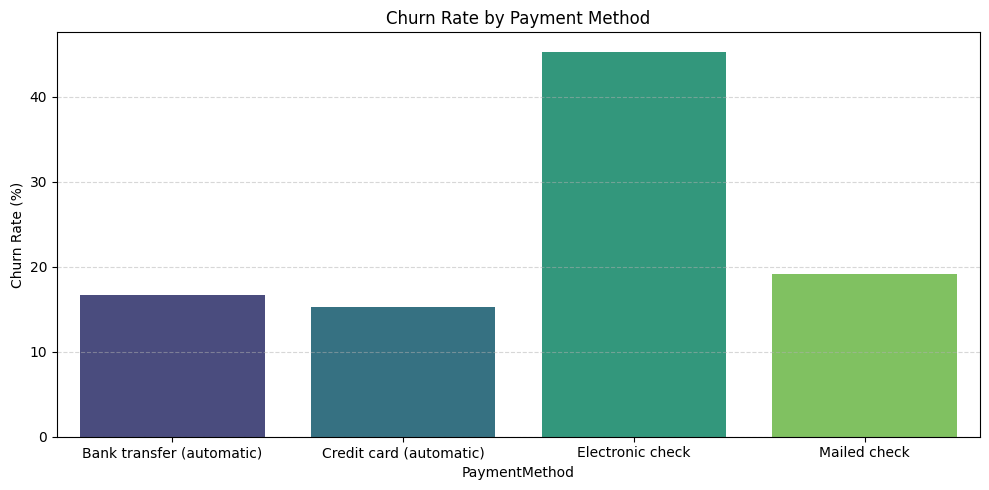

In [75]:
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(10,5))
sns.barplot(x=payment_churn.index, y=payment_churn.values,hue= payment_churn.index, legend=False, palette='viridis')
# plt.xticks(rotation=45)
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Payment Method')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

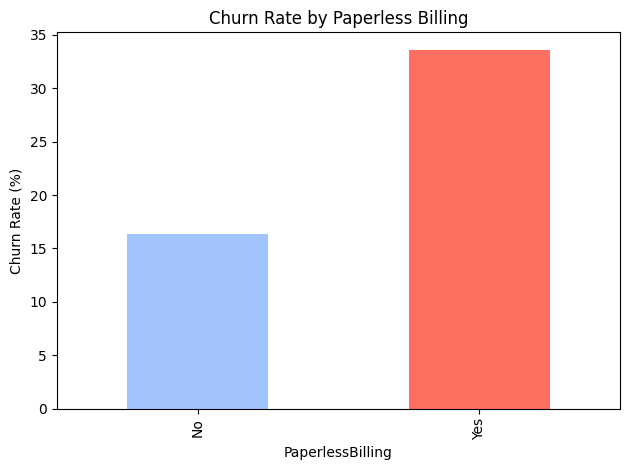

In [77]:
paperless_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100

paperless_churn.plot(kind='bar', color=['#a1c4fd', '#ff6f61'])
plt.title('Churn Rate by Paperless Billing')
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()


**📝Conclusion:**<br>
- Customers using electronic check are significantly more likely to churn.
- Customers using automatic payments tend to be more loyal.
- Paperless billing users show higher churn—possibly due to weaker engagement or lack of reminder triggers.

**------------------------------------------------------------------------------------------------------------------------------------------**

## **📝Final Conclusion**

Our analysis of the Telco Customer Churn dataset reveals several important insights:

- **Contract type and tenure** have the strongest correlation with churn. Customers with longer contracts (1 or 2 years) and longer tenure are far less likely to churn.
- **Monthly charges** impact churn—customers paying **above average charges** are more likely to leave.
- Lack of **Tech Support**, **Online Security**, and **Online Backup** services are strong indicators of higher churn.
- **Electronic check** as a payment method is highly associated with churn (~45%), while automatic payment methods have lower churn.
- Customers with **paperless billing** are also more likely to churn than those receiving physical bills.
- **Streaming services** like TV or movies do not show a strong influence on churn.



**-------------------------------------------------------------------------------------------------------------------------------------------**

## **✨Recommendations**
- Encourage customers to opt for **longer contracts** through promotions or loyalty programs to improve retention.
- Offer **bundled services** that include Tech Support, Online Security, and Online Backup at discounted rates.
- Investigate why customers with **high monthly charges** are churning—consider tier restructuring or value-added services.
- Consider reducing friction for customers using **electronic checks**—or incentivize switching to automatic payment methods.
- Use **paper-based billing reminders** as an optional feature to re-engage paperless users.
